In [4]:
import data_prep.rodents as rodents
import pandas as pd
import geopandas as gpd
import plotly.express as px

In [10]:
nyc_geojson = gpd.read_file("./data_prep/2010 Neighborhood Tabulation Areas (NTAs).geojson")

In [24]:
rodent_activity = rodents.query_data("./data_prep/Rodent_Inspection.parquet", "20180101", "20181231", ["Initial"], ["Rat Activity"])
rodent_activity = gpd.GeoDataFrame(rodent_activity, geometry=gpd.points_from_xy(rodent_activity.LONGITUDE, rodent_activity.LATITUDE))
rodent_activity = rodent_activity.loc[rodent_activity["LONGITUDE"] != 0]

In [25]:
rodent_activity.head()

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,...,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION,geometry
50007,Initial,12519368,PC6507523,1,1009720001,1,972,1,240,1 AVENUE,...,990300.0,205925.0,40.731644,-73.982197,Manhattan,2018-11-19 13:30:33,Rat Activity,11/26/2018 09:29:44 AM,"(40.731643509952, -73.982197248681)",POINT (-73.98220 40.73164)
50116,Initial,11584971,PC7232987,1,3015980001,3,1598,1,997,DEKALB AVENUE,...,1002141.0,191838.0,40.693203,-73.935483,Brooklyn,2018-02-28 14:00:40,Rat Activity,03/07/2018 04:02:21 PM,"(40.693202715519, -73.935483439817)",POINT (-73.93548 40.69320)
50357,Initial,12470606,PC7190269,1,3035320124,3,3532,124,2083,UNION STREET,...,1006155.0,181696.0,40.665219,-73.921287,Brooklyn,2018-07-11 12:45:43,Rat Activity,07/24/2018 03:39:10 PM,"(40.665219084998, -73.921286967881)",POINT (-73.92129 40.66522)
50375,Initial,11443560,PC7256727,1,3033770038,3,3377,38,293,CORNELIA STREET,...,1008837.0,192303.0,40.694463,-73.911335,Brooklyn,2018-10-05 13:29:44,Rat Activity,10/15/2018 04:18:36 PM,"(40.694462902746, -73.91133537023)",POINT (-73.91134 40.69446)
50440,Initial,11422404,PC7146875,1,3030750025,3,3075,25,97,MORGAN AVENUE,...,1003062.0,196942.0,40.707210,-73.932148,Brooklyn,2018-03-05 15:55:00,Rat Activity,03/06/2018 09:31:20 AM,"(40.70721010812, -73.93214792032)",POINT (-73.93215 40.70721)


<AxesSubplot: >

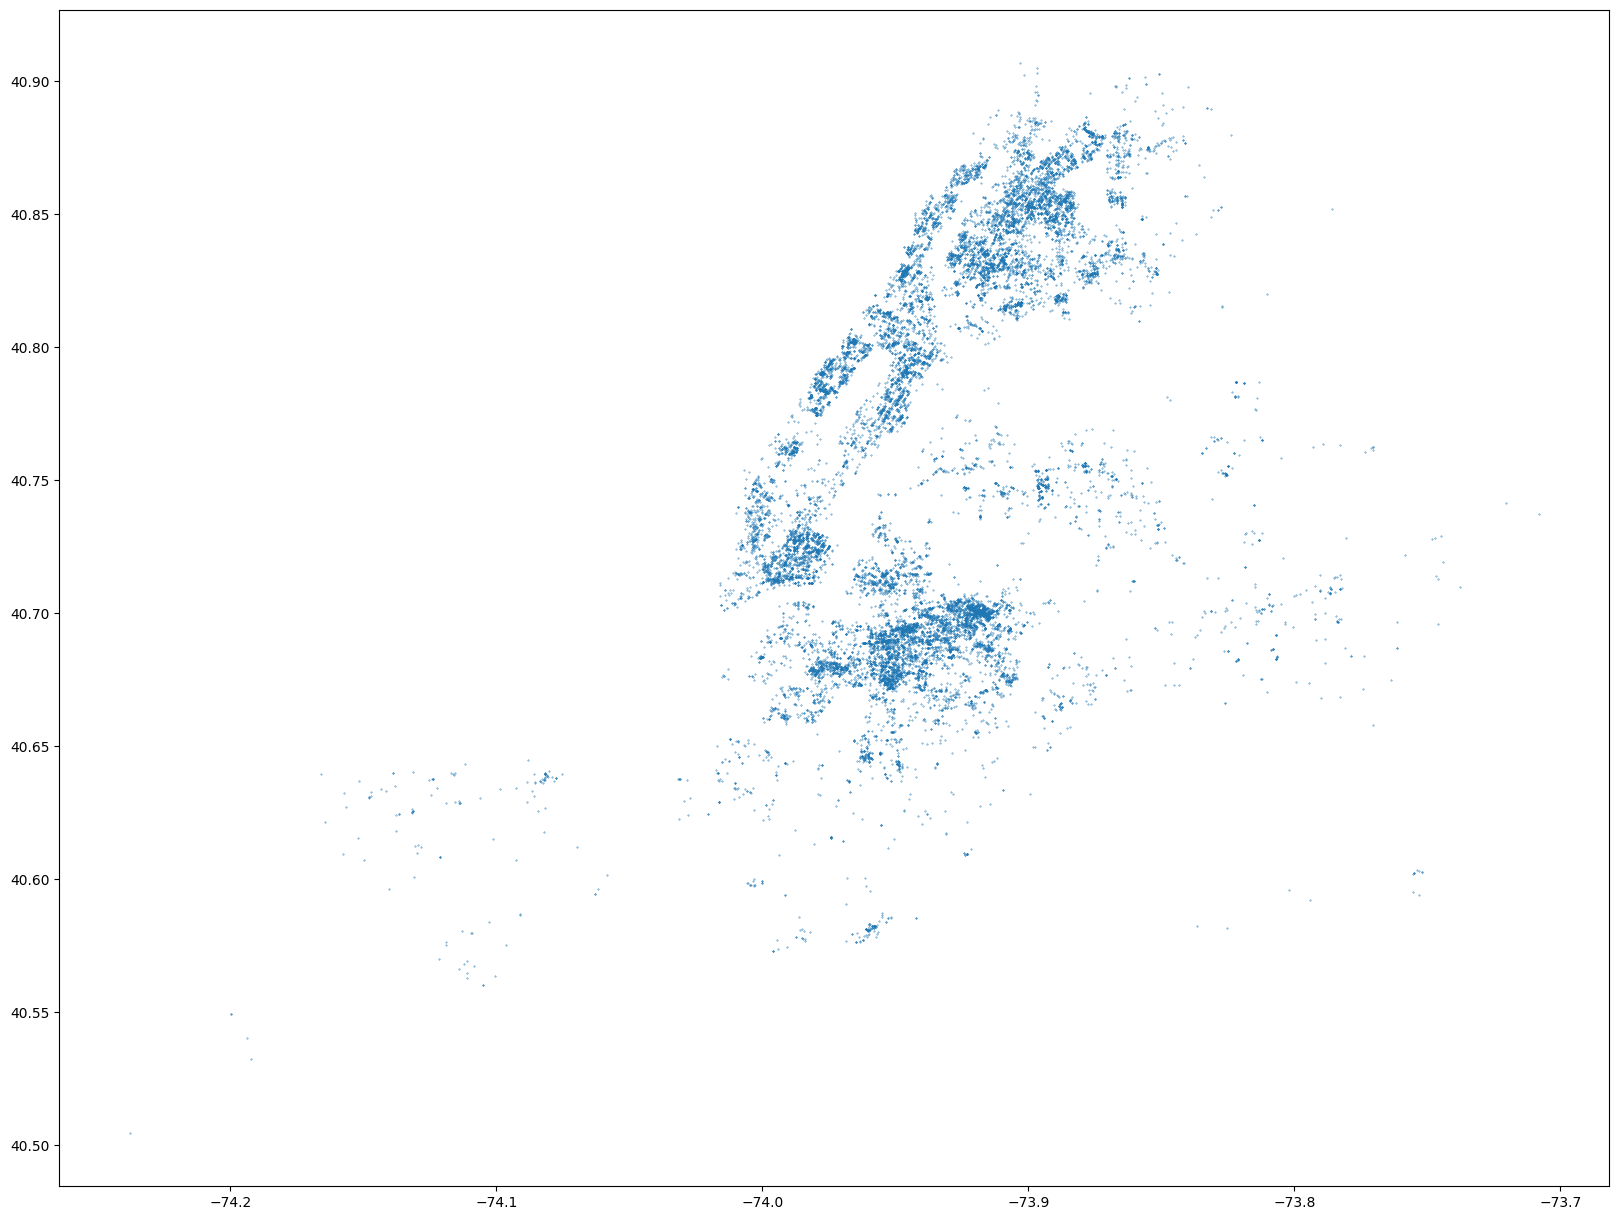

In [37]:
rodent_activity.plot(markersize=0.1, figsize=(20,30))

<AxesSubplot: >

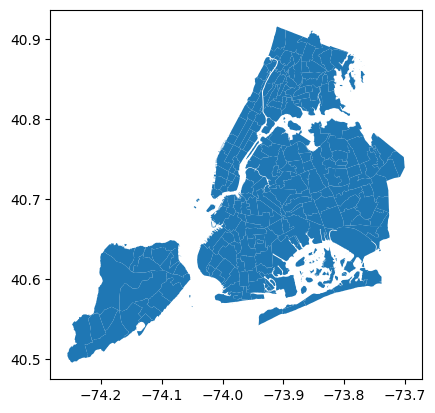

In [20]:
nyc_geojson.plot()

In [15]:
fig = px.choropleth(nyc_geojson)
fig.show()